# 1. Thông tin dữ liệu

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from pymannkendall import original_test

from dataflow import df_train, df_test, df_geography, df_product
# Kết nối tự nhiên giữa các bảng
df = df_train.merge(df_geography, on='Zip', how='left').merge(df_product, on='ProductID', how='left')


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901561 entries, 0 to 901560
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   ProductID  901561 non-null  int64         
 1   Date       901561 non-null  datetime64[ns]
 2   Zip        901561 non-null  int64         
 3   Units      901561 non-null  int64         
 4   Revenue    901561 non-null  float64       
 5   COGS       901561 non-null  float64       
 6   City       901561 non-null  object        
 7   State      901561 non-null  object        
 8   Region     901561 non-null  object        
 9   District   901561 non-null  object        
 10  Category   901561 non-null  object        
 11  Segment    901561 non-null  object        
 12  Product    901561 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 89.4+ MB


In [4]:
df.head()

,ProductID,Date,Zip,Units,Revenue,COGS,City,State,Region,District,Category,Segment,Product
0,1228,2013-07-31,78773,12,19648.44,12309.747660,"Austin, TX",TX,Central,District #23,Urban,Convenience,Pirum UC-30
1,781,2014-03-12,90501,16,20351.52,13497.128064,"Torrance, CA",CA,West,District #37,Rural,Productivity,Natura RP-69
2,2090,2013-11-29,44460,26,111367.62,91488.499830,"Salem, OH",OH,East,District #14,Urban,Convenience,Currus UC-25
3,1116,2018-08-29,30122,12,36280.44,21967.806420,"Lithia Springs, GA",GA,East,District #09,Rural,Select,Pirum RS-04
4,993,2013-04-27,75789,14,55557.18,48645.866808,"Troup, TX",TX,Central,District #24,Urban,Convenience,Natura UC-56


# 2. Phân loại

## 2.1 Phân cụm sản phẩm dựa trên tổng doanh thu

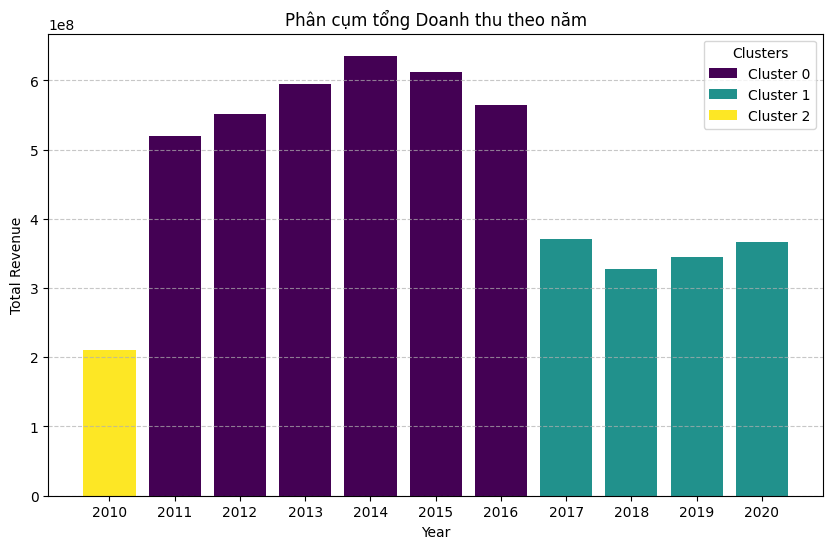

,Year,Revenue,Cluster
0,2010,2.104365e+08,2
1,2011,5.199015e+08,0
2,2012,5.508145e+08,0
3,2013,5.942496e+08,0
4,2014,6.356110e+08,0
5,2015,6.124530e+08,0
6,2016,5.640998e+08,0
7,2017,3.704278e+08,1
8,2018,3.272709e+08,1
9,2019,3.453526e+08,1


In [61]:
# Re-load necessary libraries after execution reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



# Extract year from Date
df_train["Year"] = df_train["Date"].dt.year

# Group data by Year and sum Revenue
df_revenue = df_train.groupby("Year")["Revenue"].sum().reset_index()

# Normalize Revenue
scaler = StandardScaler()
df_revenue["Revenue_Scaled"] = scaler.fit_transform(df_revenue[["Revenue"]])

# Apply K-Means Clustering
best_k = 3   # Optimal number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_revenue["Cluster"] = kmeans.fit_predict(df_revenue[["Revenue_Scaled"]])

# Plot the clustering results
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, best_k))

for cluster in range(best_k):
    subset = df_revenue[df_revenue["Cluster"] == cluster]
    plt.bar(subset["Year"], subset["Revenue"], color=colors[cluster], label=f"Cluster {cluster}")

plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.title("Phân cụm tổng Doanh thu theo năm")
plt.legend(title="Clusters")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(df_revenue["Year"])
plt.show()

# Display the clustering results
df_revenue[["Year", "Revenue", "Cluster"]]


### Nhận xét:

#### Xu hướng doanh thu theo từng năm:

Biểu đồ hiển thị tổng doanh thu theo từng năm và phân cụm dữ liệu thành ba nhóm màu sắc khác nhau:

🟣 Cluster 0 (Màu tím đậm): Giai đoạn 2011-2016 có doanh thu cao nhất.

🟦 Cluster 1 (Màu xanh lam): Giai đoạn 2017-2020 có doanh thu thấp hơn.

🟡 Cluster 2 (Màu vàng): Chỉ xuất hiện vào năm 2010 với doanh thu thấp hơn so với các năm khác, cho thấy sự suy giảm liên tục trong những năm gần đây.

#### Sự thay đổi cụm doanh thu:

- Từ 2010-2016: Doanh thu biến động mạnh, xen kẽ giữa Cluster 2 và Cluster 0, cho thấy có sự tăng trưởng nhưng không ổn định.
- Sau 2016: Doanh thu giảm mạnh, rơi xuống Cluster 1, chứng tỏ sự suy giảm trong kinh doanh, có thể do thay đổi xu hướng thời trang, cạnh tranh mạnh hơn hoặc sự kiện kinh tế ảnh hưởng đến sức mua (dịch bệnh, mua bán online,...)

#### Chiến lược đầu tư dựa trên xu hướng doanh thu:

1. Điều tra nguyên nhân suy giảm doanh thu (2017 - 2020)
- Phân tích yếu tố ảnh hưởng:
- Có phải do thay đổi hành vi tiêu dùng? (Khách hàng giảm chi tiêu vào thời trang?).
- Cạnh tranh từ đối thủ mới? (Các thương hiệu mới nổi, sự thay đổi kênh phân phối từ cửa hàng vật lý sang online?).
- Ảnh hưởng từ xu hướng thị trường? (Thời trang bền vững, sự thay đổi phong cách?).

Giải pháp:

- Thực hiện khảo sát khách hàng, nghiên cứu thị trường để xác định vấn đề chính.
- Cải thiện chiến lược quảng cáo & tiếp thị, tập trung vào kênh online và thương mại điện tử.

2. Tận dụng giai đoạn doanh thu cao (2013 - 2016) để tái thiết lập mô hình kinh doanh
- Những năm này, doanh thu đạt đỉnh => Cần phân tích:
- Kênh phân phối: Cửa hàng offline có phải là kênh chính? Hay có chiến dịch bán hàng đặc biệt?
- Sản phẩm bán chạy: Nhóm sản phẩm nào có doanh thu cao nhất? Có thể tái sản xuất hoặc tối ưu danh mục sản phẩm.
- Đối tượng khách hàng: Đối tượng nào chiếm phần lớn doanh thu? Có thể mở rộng thêm hay đã thay đổi hành vi?

3. Đầu tư vào đổi mới sản phẩm và xu hướng mới
- Mở rộng danh mục sản phẩm: Đưa thêm dòng sản phẩm mới phù hợp với nhu cầu hiện tại.
- Chuyển dịch sang thương mại điện tử: Nếu xu hướng bán hàng online đang tăng, hãy đầu tư vào nền tảng trực tuyến.
- Tập trung vào cá nhân hóa: Ứng dụng AI để phân tích hành vi mua sắm và đề xuất sản phẩm phù hợp.

4. Chiến lược tài chính
- Giai đoạn 2021+: Nếu xu hướng doanh thu tiếp tục giảm, cần đánh giá lại cửa hàng có doanh số thấp để tối ưu chi phí vận hành.
- Tái phân bổ ngân sách: Đầu tư mạnh hơn vào các kênh bán hàng hiệu quả thay vì giữ mô hình truyền thống.

## 2.2 Phân loại sản phẩm theo tổng doanh số

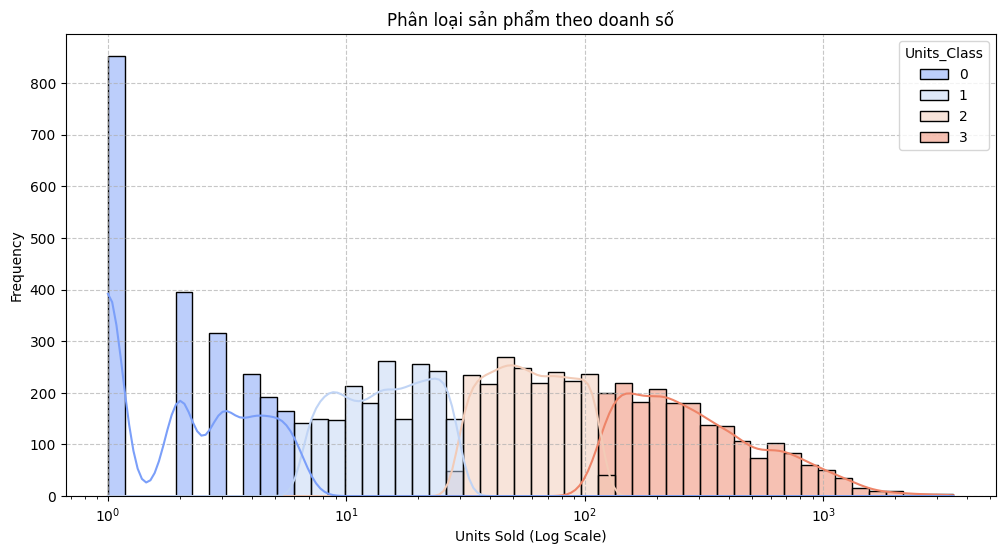

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score
from imblearn.over_sampling import SMOTE


warnings.filterwarnings('ignore')

from dataflow import df_train, df_test, df_geography, df_product
# Kết nối tự nhiên giữa các bảng
df = df_train.merge(df_geography, on='Zip', how='left').merge(df_product, on='ProductID', how='left')


# Trích xuất năm từ Date
df_train["Year"] = df_train["Date"].dt.year

# Nhóm dữ liệu theo ProductID và Year, tính tổng số lượng bán (Units)
df_grouped = df_train.groupby(["Year", "ProductID"])["Units"].sum().reset_index()

# Chuẩn bị dữ liệu cho mô hình phân loại
df_grouped["Units_Class"] = pd.qcut(df_grouped["Units"], q=4, labels=[0, 1, 2, 3])  # Chia thành 4 nhóm

# Chia dữ liệu train-test
X = df_grouped[["Year"]]
y = df_grouped["Units_Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình RandomForest để phân loại
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)



smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



    # Vẽ biểu đồ phân phối Units theo các lớp với cải tiến
plt.figure(figsize=(12, 6))
sns.histplot(df_grouped, x="Units", hue="Units_Class", bins=50, palette="coolwarm", kde=True, log_scale=True)
plt.xlabel("Units Sold (Log Scale)")
plt.ylabel("Frequency")
plt.title("Phân loại sản phẩm theo doanh số")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()



### Nhận xét:

#### 🔍 1. Phân bố sản phẩm theo số lượng bán ra (Log Scale):

- Biểu đồ hiển thị phân phối số lượng sản phẩm bán ra theo trục logarit.
- Có hai nhóm màu sắc chính đại diện cho hai phân loại sản phẩm:

🔵 Sản phẩm bán ít (màu xanh nhạt - bên trái).

🔴 Sản phẩm bán chạy (màu đỏ nhạt - bên phải).

#### 💡 2. Đặc điểm chính của phân phối doanh số:

- Rất nhiều sản phẩm bán rất ít (bên trái, dưới 10 đơn vị).
- Sản phẩm bán trung bình (từ 10 - 100 đơn vị) có số lượng lớn, nhưng không phải tất cả đều tiềm năng.
- Sản phẩm bán chạy (trên 100 - 1000+ đơn vị) có số lượng ít, nhưng chiếm phần lớn doanh thu.

#### 📉 3. Dấu hiệu quan trọng cần chú ý:

- Hiệu ứng "Long Tail" rõ rệt: Có rất nhiều sản phẩm bán rất ít, trong khi một số ít sản phẩm bán cực kỳ mạnh.
- Phân phối không đối xứng, nghiêng về phía các sản phẩm có doanh số thấp hơn.
- Có sự tách biệt rõ ràng giữa nhóm sản phẩm bán chạy và nhóm kém hiệu quả, điều này giúp dễ dàng ra quyết định đầu tư.

### Chiến lược đầu tư dựa trên dữ liệu
#### ✅ 1. Đầu tư mạnh vào nhóm sản phẩm bán chạy (bên phải, màu đỏ nhạt) 🚀

- Tập trung vào các sản phẩm thuộc nhóm top bán chạy để tối đa hóa doanh thu.
- Tăng cường quảng bá, tối ưu nguồn cung & mở rộng thị trường cho những sản phẩm này.
- Xây dựng chương trình khuyến mãi, upsell & cross-sell để tận dụng lợi thế bán hàng.

#### ✅ 2. Kiểm tra lại nhóm sản phẩm bán ít (bên trái, màu xanh nhạt) 🔍

- Cắt giảm hoặc điều chỉnh danh mục sản phẩm có doanh số kém để tối ưu nguồn lực.
- Cải tiến hoặc thay đổi chiến lược marketing cho những sản phẩm có tiềm năng nhưng chưa bán chạy.
- Tận dụng AI để phân tích nguyên nhân doanh số thấp (giá cả, thị hiếu khách hàng, chất lượng sản phẩm?).

#### ✅ 3. Tạo chiến lược thúc đẩy nhóm sản phẩm có doanh số trung bình 🏗

- Nếu một số sản phẩm nằm giữa nhóm bán ít và bán chạy, có thể đầu tư để đẩy lên nhóm cao hơn.
- Chạy chiến dịch quảng bá thử nghiệm để kiểm tra mức độ phản ứng của khách hàng.
- Điều chỉnh giá hoặc gói sản phẩm để thu hút nhiều người mua hơn.

## 2.3 Tìm tham số cụm tối ưu

 ##### Để tìm ra số k cụm tối ưu, chúng tôi kỳ vọng tối thiểu hóa độ đo WCSS và tối đa hóa độ đo Silhouette cho từng giá trị 𝑘 (từ 2 đến 10) dựa trên vector đặc trưng gồm Revenue, Units, AvgPrice và ProfitMargin.

Kết quả phân cụm với các thuộc tính: Revenue, Units, AvgPrice, ProfitMargin
k = 2: WCSS = 5285.69, Silhouette Score = 0.2807
k = 3: WCSS = 3480.30, Silhouette Score = 0.3229
k = 4: WCSS = 2723.99, Silhouette Score = 0.3405
k = 5: WCSS = 2461.05, Silhouette Score = 0.3230
k = 6: WCSS = 1953.50, Silhouette Score = 0.3388
k = 7: WCSS = 1768.24, Silhouette Score = 0.3426
k = 8: WCSS = 1615.72, Silhouette Score = 0.2928
k = 9: WCSS = 1466.61, Silhouette Score = 0.3005
k = 10: WCSS = 1265.51, Silhouette Score = 0.3270


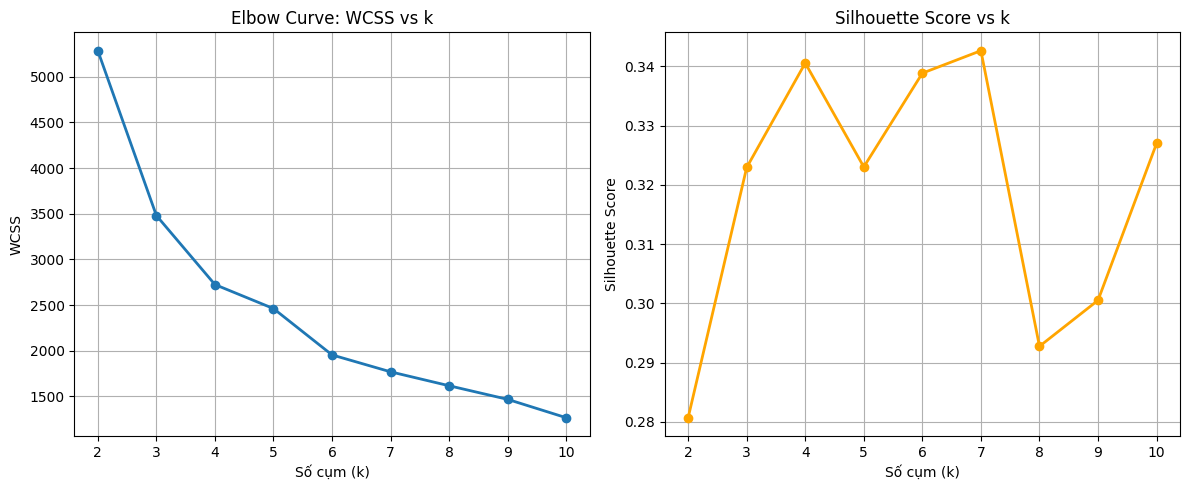

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Nhóm dữ liệu theo ProductID: tổng hợp doanh thu, doanh số và giá vốn toàn thời gian.
product_stats = df.groupby('ProductID')[['Revenue', 'Units', 'COGS']].sum().reset_index()

# Tính các thuộc tính bổ sung:
# Giá bán trung bình = Revenue / Units (tránh chia cho 0)
product_stats['AvgPrice'] = product_stats.apply(lambda row: row['Revenue'] / row['Units'] if row['Units'] > 0 else 0, axis=1)
# Lợi nhuận = Revenue - COGS
product_stats['Profit'] = product_stats['Revenue'] - product_stats['COGS']
# Tỷ lệ lợi nhuận = Profit / Revenue (tránh chia cho 0)
product_stats['ProfitMargin'] = product_stats.apply(lambda row: row['Profit'] / row['Revenue'] if row['Revenue'] > 0 else 0, axis=1)

# Chọn các thuộc tính làm vector đặc trưng
features = product_stats[['Revenue', 'Units', 'AvgPrice', 'ProfitMargin']]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Tìm số cụm tối ưu: duyệt k từ 2 đến 10, tính WCSS và Silhouette Score
results = []
print("Kết quả phân cụm với các thuộc tính: Revenue, Units, AvgPrice, ProfitMargin")
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features_scaled)
    
    # WCSS
    wcss = kmeans.inertia_
    
    # Silhouette Score
    sil_score = silhouette_score(features_scaled, cluster_labels)
    
    results.append((k, wcss, sil_score))
    print(f"k = {k}: WCSS = {wcss:.2f}, Silhouette Score = {sil_score:.4f}")

# Vẽ biểu đồ Pareto: 2 subplot (Elbow curve cho WCSS và Silhouette Score)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

k_values = [r[0] for r in results]
wcss_values = [r[1] for r in results]
sil_values = [r[2] for r in results]

ax1.plot(k_values, wcss_values, marker='o', lw=2)
ax1.set_title("Elbow Curve: WCSS vs k")
ax1.set_xlabel("Số cụm (k)")
ax1.set_ylabel("WCSS")
ax1.grid(True)

ax2.plot(k_values, sil_values, marker='o', color='orange', lw=2)
ax2.set_title("Silhouette Score vs k")
ax2.set_xlabel("Số cụm (k)")
ax2.set_ylabel("Silhouette Score")
ax2.grid(True)

plt.tight_layout()
plt.show()


##### Biên Pareto theo 2 độ đo này được trình bày dưới đây:

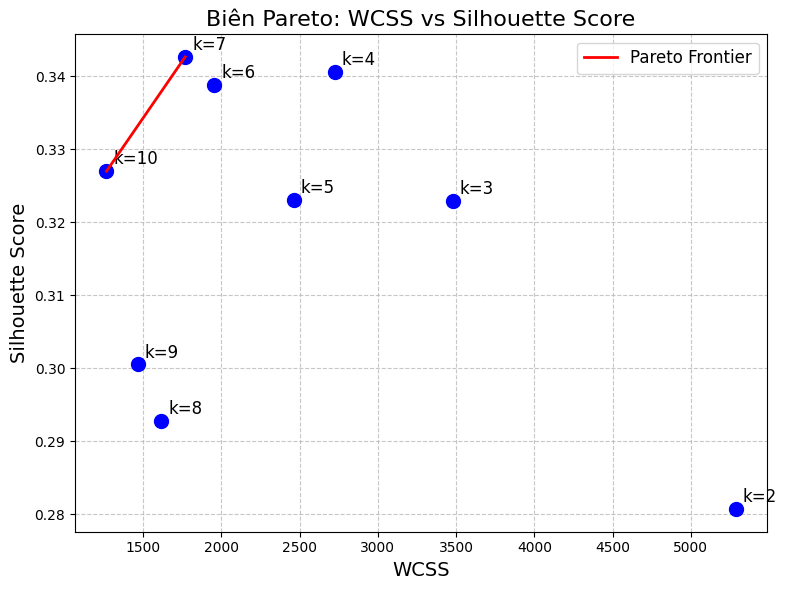

In [ ]:
import matplotlib.pyplot as plt

# Từ phần kết quả đã tính
k_values = [r[0] for r in results]
wcss_values = [r[1] for r in results]
sil_values = [r[2] for r in results]

# Vẽ scatter plot cho tất cả các kết quả
plt.figure(figsize=(8,6))
plt.scatter(wcss_values, sil_values, s=100, color='blue', zorder=2)
for k, w, s in zip(k_values, wcss_values, sil_values):
    plt.annotate(f"k={k}", (w, s), textcoords="offset points", xytext=(5,5), fontsize=12)

plt.xlabel("WCSS", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.title("Biên Pareto: WCSS vs Silhouette Score", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)

# Hàm tính Pareto frontier
def compute_pareto(x, y):
    # Ta cần tìm những điểm mà không bị chi phối: giảm WCSS (x thấp hơn) và tăng silhouette (y cao hơn)
    points = list(zip(x, y))
    pareto_points = []
    for i, (xi, yi) in enumerate(points):
        dominated = False
        for j, (xj, yj) in enumerate(points):
            if j != i:
                # Nếu xj <= xi và yj >= yi (với ít nhất 1 điều kiện <, >) thì xi,yi bị chi phối
                if (xj < xi and yj >= yi) or (xj <= xi and yj > yi):
                    dominated = True
                    break
        if not dominated:
            pareto_points.append((xi, yi, k_values[i]))
    return pareto_points

# Tính Pareto frontier
pareto = compute_pareto(wcss_values, sil_values)
# Sắp xếp theo WCSS (hoặc silhouette)
pareto_sorted = sorted(pareto, key=lambda t: t[0])
pareto_x = [t[0] for t in pareto_sorted]
pareto_y = [t[1] for t in pareto_sorted]

# Vẽ đường nối các điểm Pareto bằng màu đỏ
plt.plot(pareto_x, pareto_y, color='red', lw=2, zorder=3, label="Pareto Frontier")

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


##### Từ biểu đồ trên chúng tôi chọn k=7. Dưới đây là 4 biểu đồ phân phối của Revenue, Units, AvgPrice và ProfitMargin theo 7 cụm sản phẩm:

Số sản phẩm trong mỗi cụm:
Cluster
0    580
1    478
2    140
3     27
4    277
5      5
6    117
Name: count, dtype: int64


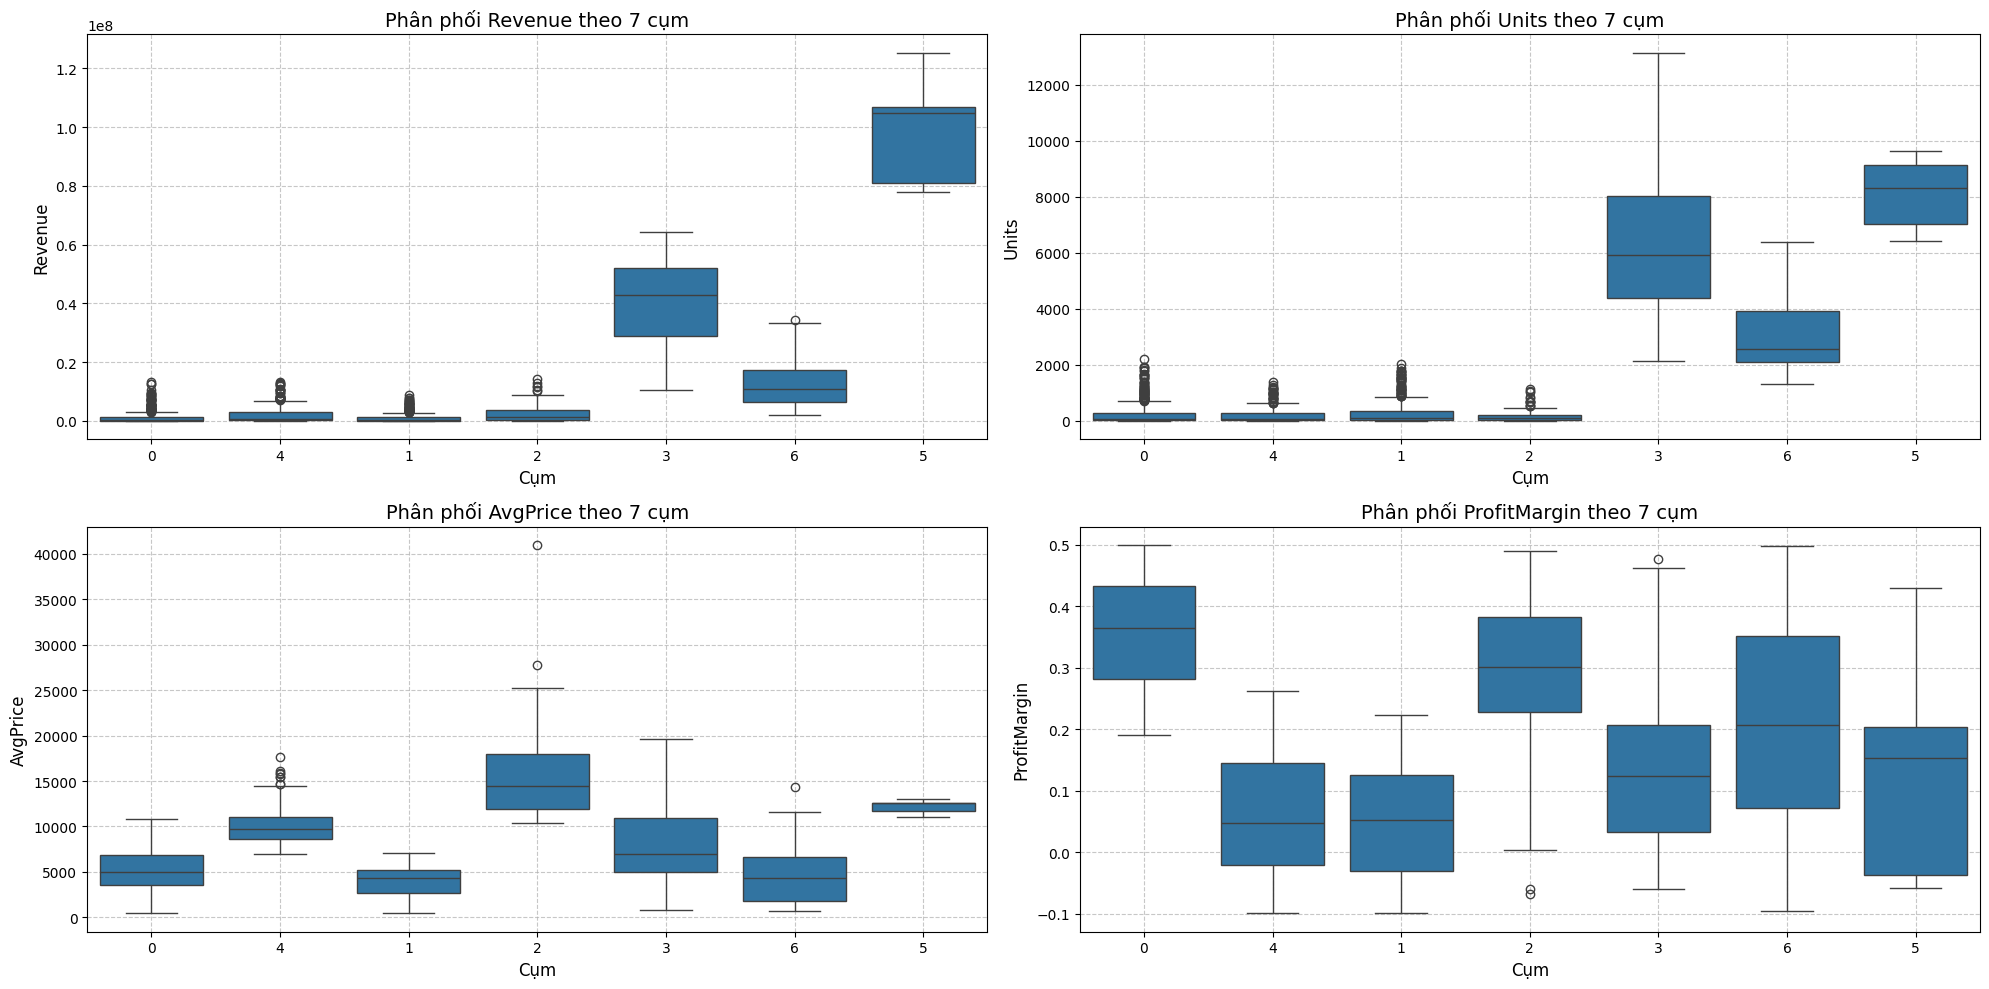

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Giả sử df là DataFrame gốc có các cột: ProductID, Revenue, Units, COGS,...
# Bước 1: Nhóm dữ liệu theo ProductID và tính tổng toàn thời gian
product_stats = df.groupby('ProductID')[['Revenue', 'Units', 'COGS']].sum().reset_index()

# Tính các thuộc tính bổ sung
product_stats['AvgPrice'] = product_stats.apply(lambda row: row['Revenue'] / row['Units'] if row['Units'] > 0 else 0, axis=1)
product_stats['Profit'] = product_stats['Revenue'] - product_stats['COGS']
product_stats['ProfitMargin'] = product_stats.apply(lambda row: row['Profit'] / row['Revenue'] if row['Revenue'] > 0 else 0, axis=1)

# Chọn vector đặc trưng gồm 4 thuộc tính
features = product_stats[['Revenue', 'Units', 'AvgPrice', 'ProfitMargin']]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Áp dụng KMeans với k = 7
k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Gán nhãn cụm vào DataFrame
product_stats['Cluster'] = clusters.astype(str)  # Chuyển thành string để dùng cho boxplot

# In ra số lượng sản phẩm trong mỗi cụm (tuỳ chọn)
print("Số sản phẩm trong mỗi cụm:")
print(product_stats['Cluster'].value_counts().sort_index())

# 4 thuộc tính để vẽ phân phối
attributes = ['Revenue', 'Units', 'AvgPrice', 'ProfitMargin']

# Tạo figure với 4 subplot (2 hàng x 2 cột)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axes = axes.flatten()

for i, attr in enumerate(attributes):
    sns.boxplot(x='Cluster', y=attr, data=product_stats, ax=axes[i])
    axes[i].set_title(f"Phân phối {attr} theo 7 cụm", fontsize=14)
    axes[i].set_xlabel("Cụm", fontsize=12)
    axes[i].set_ylabel(attr, fontsize=12)
    # Tùy chỉnh hiển thị nhãn nếu cần
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# 3. Phân cụm toàn thời gian:

## 3.1 Phân cụm sản phẩm dựa theo các đặc trưng của Revenue và Units

### 3.1.1 Phân cụm sản phẩm dựa theo tổng Revenue và Units toàn thời gian

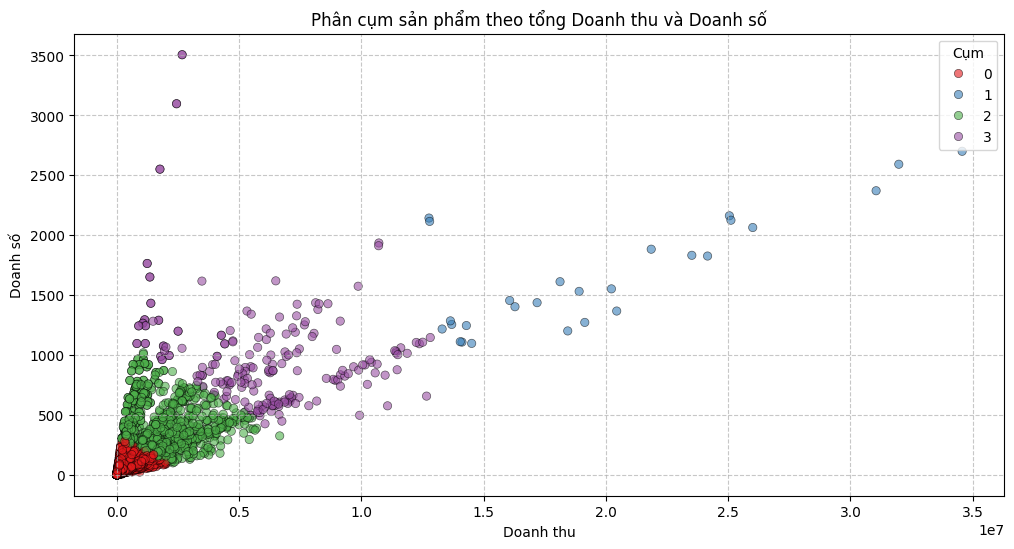

In [5]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, Birch
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


from dataflow import df_train, df_test, df_geography, df_product

# Kết nối dữ liệu
df = df_train.merge(df_geography, on='Zip', how='left').merge(df_product, on='ProductID', how='left')
df["Year"] = df["Date"].dt.year

# Nhóm dữ liệu theo ProductID và Year để tổng hợp Revenue và Profit Margin
df_kmeans = df.groupby(["ProductID", "Year"], as_index=False).agg({
    "Revenue": "sum",  # Tổng doanh thu theo năm
    "Units": "sum"      # Tổng doanh sốsố theo năm
}).dropna()


# Chuẩn hóa dữ liệu để phân cụm
scaler = StandardScaler()
df_kmeans_scaled = scaler.fit_transform(df_kmeans[["Revenue", "Units"]])

# Xác định số cụm k tối ưu bằng phương pháp Elbow
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_kmeans_scaled)
    wcss.append(kmeans.inertia_)


# Áp dụng K-Means với k tối ưu (giả sử k=4 dựa trên phân tích Elbow)
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_kmeans["Cluster"] = kmeans_final.fit_predict(df_kmeans_scaled)

# Vẽ biểu đồ phân cụm trên mặt phẳng Revenue - Profit Margin
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_kmeans, x="Revenue", y="Units", hue="Cluster", palette="Set1", alpha=0.6, edgecolor="k")
plt.xlabel("Doanh thu")
plt.ylabel("Doanh số")
plt.title(f"Phân cụm sản phẩm theo tổng Doanh thu và Doanh số")
plt.legend(title="Cụm")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


### Nhận xét

##### 🔍 1️⃣ Phân bố của các cụm:
✔ Cluster 0 (Màu đỏ - Doanh thu thấp, số lượng bán thấp):

- Nhóm này tập trung gần gốc tọa độ, có doanh thu rất thấp và số lượng bán cũng thấp.
- Đây có thể là các sản phẩm bán chậm hoặc ít phổ biến, cần xem xét cải tiến hoặc loại bỏ.

✔ Cluster 1 (Màu xanh dương - Doanh thu cao, số lượng bán cao):

- Sản phẩm trong nhóm này có doanh thu và số lượng bán rất cao.
- Đây có thể là các sản phẩm bán chạy nhất, đóng vai trò quan trọng trong tổng doanh thu.

✔ Cluster 2 (Màu xanh lá - Số lượng bán cao nhưng doanh thu thấp):

- Những sản phẩm có số lượng bán cao nhưng doanh thu không cao. Điều này có thể xảy ra nếu sản phẩm có giá bán thấp hoặc biên lợi nhuận thấp.
- Cần xem xét tăng giá hoặc tối ưu chi phí để cải thiện lợi nhuận.

✔ Cluster 3 (Màu tím - Trung gian, doanh thu trung bình, số lượng bán trung bình):

- Nhóm này có doanh thu và số lượng bán ở mức trung bình.
- Có thể là sản phẩm tiềm năng, nếu cải thiện marketing hoặc chiến lược giá có thể thúc đẩy doanh số.

 ##### 2️⃣ Chiến lược kinh doanh gợi ý

✔ Đối với sản phẩm trong Cluster 0 (màu đỏ - Doanh thu & Số lượng bán thấp)

- Loại bỏ các sản phẩm không sinh lời hoặc cải thiện thiết kế & tiếp thị.

- Kiểm tra lại giá cả và kênh phân phối để tăng sự hấp dẫn.

✔ Đối với sản phẩm trong Cluster 1 (màu xanh dương - Bán chạy nhất)

- Tăng cường sản xuất, quảng cáo và mở rộng kênh bán hàng.

- Cân nhắc tối ưu giá bán để cải thiện biên lợi nhuận.

✔ Đối với sản phẩm trong Cluster 2 (màu xanh lá - Số lượng bán cao nhưng doanh thu thấp)

- Xem xét điều chỉnh giá bán để tối đa hóa doanh thu.

- Đàm phán chi phí sản xuất để cải thiện lợi nhuận.

✔ Đối với sản phẩm trong Cluster 3 (màu tím - Tiềm năng phát triển)

- Thử nghiệm chiến lược quảng cáo & ưu đãi để tăng doanh số.

- Xác định sản phẩm nào có khả năng trở thành best-seller trong tương lai.

### 3.1.2 Phân cụm sản phẩm dựa theo mean và std của Revenue 

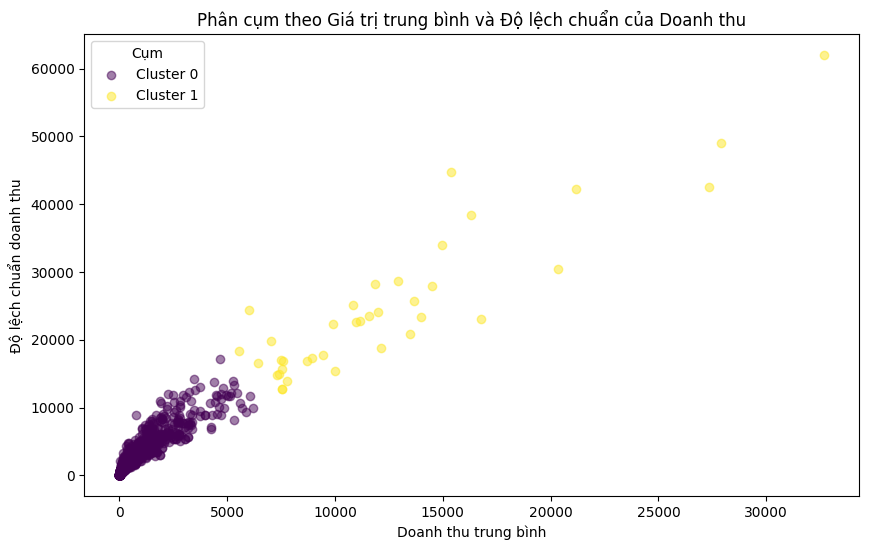

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from dataflow import df_train, df_test, df_geography, df_product

# Kết nối dữ liệu
df = df_train.merge(df_geography, on='Zip', how='left').merge(df_product, on='ProductID', how='left')


# Đảm bảo cột "Date" có định dạng datetime
df_train["Date"] = pd.to_datetime(df_train["Date"])

# Groupby theo ProductID và Date trước
df_grouped = df_train.groupby(["ProductID", "Date"]).agg({"Revenue": "sum", "Units": "sum"}).reset_index()

# Xác định toàn bộ phạm vi ngày
date_range_full = pd.date_range(start=df_grouped["Date"].min(), end=df_grouped["Date"].max())

# Tạo DataFrame chứa mọi kết hợp ProductID và Date
products = df_grouped["ProductID"].unique()
full_index = pd.MultiIndex.from_product([products, date_range_full], names=["ProductID", "Date"])
df_full = pd.DataFrame(index=full_index).reset_index()

# Hợp nhất với dữ liệu gốc để đảm bảo đầy đủ ngày
df_train_full = df_full.merge(df_grouped, on=["ProductID", "Date"], how="left")

# Điền giá trị NaN (giả định ngày không có giao dịch tức là doanh thu và số lượng bán = 0)
df_train_full[["Revenue", "Units"]] = df_train_full[["Revenue", "Units"]].fillna(0)

# Tính trung bình (mean) và độ lệch chuẩn (std) trên toàn bộ thời gian của từng sản phẩm
df_stats = df_train_full.groupby("ProductID").agg({"Revenue": ["mean", "std"], "Units": ["mean", "std"]})
df_stats.columns = ["Revenue_mean", "Revenue_std", "Units_mean", "Units_std"]
df_stats = df_stats.reset_index()

# Điền giá trị NaN nếu có
df_stats.fillna(df_stats.mean(), inplace=True)

# Chuẩn hóa dữ liệu trước khi phân cụm
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_stats[["Revenue_mean", "Revenue_std"]])

# Sử dụng Silhouette Score để tìm số cụm tối ưu
silhouette_scores = []
k_range = range(2, 11)  # Silhouette không dùng k=1

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

best_k = k_range[np.argmax(silhouette_scores)]

# **Bước 6: Phân cụm với số cụm tốt nhất**
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_stats["Cluster"] = kmeans.fit_predict(X_scaled)

# **Bước 7: Vẽ đồ thị phân cụm theo Revenue_mean và Revenue_std**
plt.figure(figsize=(10, 6))
clusters = df_stats["Cluster"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(clusters)))

for cluster, color in zip(clusters, colors):
    subset = df_stats[df_stats["Cluster"] == cluster]
    plt.scatter(subset["Revenue_mean"], subset["Revenue_std"], color=color, label=f"Cluster {cluster}", alpha=0.5)

plt.xlabel("Doanh thu trung bình")
plt.ylabel("Độ lệch chuẩn doanh thu")
plt.title(f"Phân cụm theo Giá trị trung bình và Độ lệch chuẩn của Doanh thu")
plt.legend(title="Cụm")
plt.show()



### 3.1.3 Phân cụm sản phẩm dựa theo mean và std của Units  

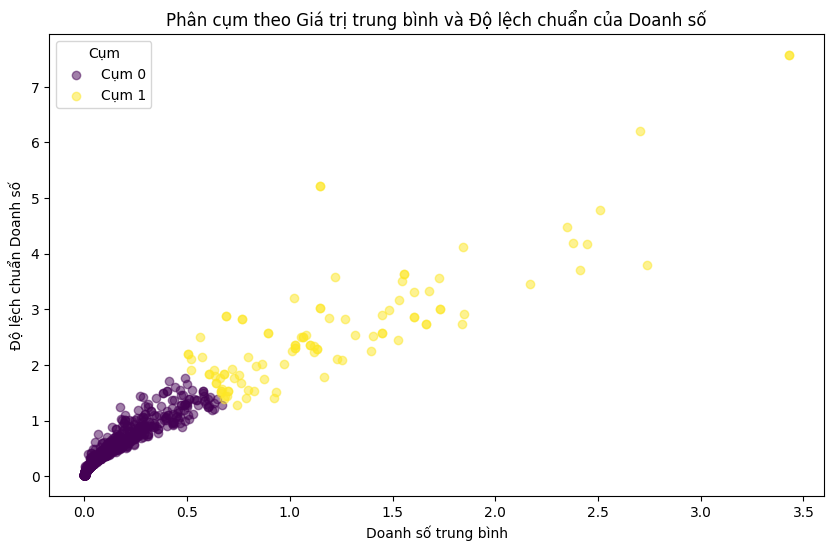

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from dataflow import df_train, df_test, df_geography, df_product

# Kết nối dữ liệu
df = df_train.merge(df_geography, on='Zip', how='left').merge(df_product, on='ProductID', how='left')


# Đảm bảo cột "Date" có định dạng datetime
df_train["Date"] = pd.to_datetime(df_train["Date"])

# Groupby theo ProductID và Date trước
df_grouped = df_train.groupby(["ProductID", "Date"]).agg({"Revenue": "sum", "Units": "sum"}).reset_index()

# Xác định toàn bộ phạm vi ngày
date_range_full = pd.date_range(start=df_grouped["Date"].min(), end=df_grouped["Date"].max())

# Tạo DataFrame chứa mọi kết hợp ProductID và Date
products = df_grouped["ProductID"].unique()
full_index = pd.MultiIndex.from_product([products, date_range_full], names=["ProductID", "Date"])
df_full = pd.DataFrame(index=full_index).reset_index()

# Hợp nhất với dữ liệu gốc để đảm bảo đầy đủ ngày
df_train_full = df_full.merge(df_grouped, on=["ProductID", "Date"], how="left")

# Điền giá trị NaN (giả định ngày không có giao dịch tức là doanh thu và số lượng bán = 0)
df_train_full[["Revenue", "Units"]] = df_train_full[["Revenue", "Units"]].fillna(0)

# Tính trung bình (mean) và độ lệch chuẩn (std) trên toàn bộ thời gian của từng sản phẩm
df_stats = df_train_full.groupby("ProductID").agg({"Revenue": ["mean", "std"], "Units": ["mean", "std"]})
df_stats.columns = ["Revenue_mean", "Revenue_std", "Units_mean", "Units_std"]
df_stats = df_stats.reset_index()

# Điền giá trị NaN nếu có
df_stats.fillna(df_stats.mean(), inplace=True)

# Chuẩn hóa dữ liệu trước khi phân cụm
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_stats[["Units_mean", "Units_std"]])

# Sử dụng Silhouette Score để tìm số cụm tối ưu
silhouette_scores = []
k_range = range(2, 11)  # Silhouette không dùng k=1

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

best_k = k_range[np.argmax(silhouette_scores)]


# **Bước 6: Phân cụm với số cụm tốt nhất**
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_stats["Cluster"] = kmeans.fit_predict(X_scaled)

# **Bước 7: Vẽ đồ thị phân cụm theo Units_mean và Units_std**
plt.figure(figsize=(10, 6))
clusters = df_stats["Cluster"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(clusters)))

for cluster, color in zip(clusters, colors):
    subset = df_stats[df_stats["Cluster"] == cluster]
    plt.scatter(subset["Units_mean"], subset["Units_std"], color=color, label=f"Cụm {cluster}", alpha=0.5)

plt.xlabel("Doanh số trung bình")
plt.ylabel("Độ lệch chuẩn Doanh số")
plt.title(f"Phân cụm theo Giá trị trung bình và Độ lệch chuẩn của Doanh số")
plt.legend(title="Cụm")
plt.show()

### 3.1.4 Phân biên Pareto sản phẩm dựa theo Units và Revenue

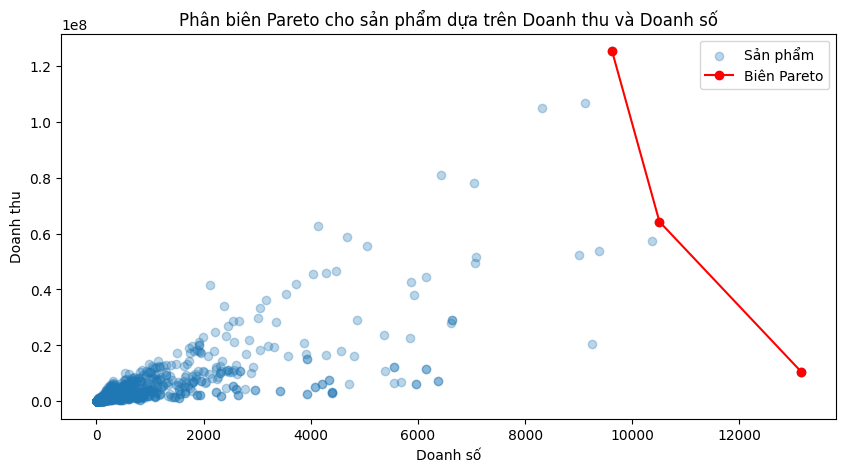

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from dataflow import df_train, df_test, df_geography, df_product

# Kết nối dữ liệu
df = df_train.merge(df_geography, on='Zip', how='left').merge(df_product, on='ProductID', how='left')

# Tính Profit Margin
df_train["Profit_Margin"] = (df_train["Revenue"] - df_train["COGS"]) / df_train["Revenue"]

# Groupby theo ProductID và Date trước
df_grouped = df_train.groupby(["ProductID", "Date"]).agg(
    Revenue=("Revenue", "sum"),
    Units=("Units", "sum"),
    Profit_Margin=("Profit_Margin", "mean")  # Tính trung bình biên lợi nhuận trong ngày
).reset_index()

# Tính tổng Revenue, Units, Profit Margin theo từng sản phẩm
df_summary = df_grouped.groupby("ProductID").agg(
    Revenue=("Revenue", "sum"),
    Units=("Units", "sum"),
    Profit_Margin=("Profit_Margin", "mean")  # Trung bình biên lợi nhuận của sản phẩm
).reset_index()

# Hàm tìm Pareto Front (theo hướng max)
def pareto_frontier(df, x_col, y_col):
    df_sorted = df.sort_values(by=[x_col, y_col], ascending=[False, False]).reset_index(drop=True)
    pareto_front = [df_sorted.iloc[0]]

    for i in range(1, len(df_sorted)):
        if df_sorted.iloc[i][y_col] > pareto_front[-1][y_col]:  # Kiểm tra trội
            pareto_front.append(df_sorted.iloc[i])

    return pd.DataFrame(pareto_front)

# Xác định Pareto Front cho (Units, Revenue)
pareto_units_revenue = pareto_frontier(df_summary, "Units", "Revenue")

# Xác định Pareto Front cho (Revenue, Profit Margin)
pareto_revenue_margin = pareto_frontier(df_summary, "Revenue", "Profit_Margin")

# Hiển thị kết quả Pareto Front cho (Units, Revenue)
plt.figure(figsize=(10, 5))
plt.scatter(df_summary["Units"], df_summary["Revenue"], alpha=0.3, label="Sản phẩm")
plt.plot(pareto_units_revenue["Units"], pareto_units_revenue["Revenue"], "r-o", label="Biên Pareto")
plt.xlabel("Doanh số")
plt.ylabel("Doanh thu")
plt.title("Phân biên Pareto cho sản phẩm dựa trên Doanh thu và Doanh số")
plt.legend()
plt.show()


### Nhận xét:

- Ở vùng số lượng bán rất cao, doanh thu có thể không quá cao (gợi ý sản phẩm có giá rẻ nhưng bán chạy).

- Ở vùng doanh thu cao nhất, số lượng bán giảm dần, cho thấy sản phẩm có giá trị cao hơn nhưng lượng tiêu thụ ít hơn.

⚠ Điểm đáng chú ý:
- Những sản phẩm có số lượng bán cao nhất không phải là sản phẩm có doanh thu cao nhất.
- Có thể là do chiến lược giá thấp để tăng khối lượng bán, nhưng biên lợi nhuận có thể bị ảnh hưởng.
- Sản phẩm ngoài Pareto Front chưa tối ưu
- Nhiều sản phẩm có doanh thu cao nhưng số lượng bán ít, có thể là hàng cao cấp.
- Nhiều sản phẩm có số lượng bán nhiều nhưng doanh thu thấp, có thể là hàng phổ thông, giá rẻ.



##### Chiến lược tối ưu hóa danh mục sản phẩm
✅ Nhóm sản phẩm có doanh thu cao nhưng số lượng bán thấp

- Tăng cường quảng bá & tiếp thị để mở rộng thị phần.
- Xem xét điều chỉnh giá để kích thích nhu cầu mà vẫn giữ lợi nhuận tốt.
- Nghiên cứu khách hàng tiềm năng, liệu có thể mở rộng phân khúc không?

✅ Nhóm sản phẩm có số lượng bán cao nhưng doanh thu trung bình

- Cải thiện chi phí sản xuất để nâng cao lợi nhuận biên.
- Thử nghiệm tăng giá nhẹ, kiểm tra độ nhạy cảm của khách hàng.
- Mở rộng phân phối, ví dụ: đẩy mạnh bán hàng online.

## 3.2 Phân cụm sản phẩm dựa theo các đặc trưng của Revenue và Profit Margin 

### 3.2.1 Phân cụm sản phẩm dựa theo Revenue và Profit Margin toàn thời gian

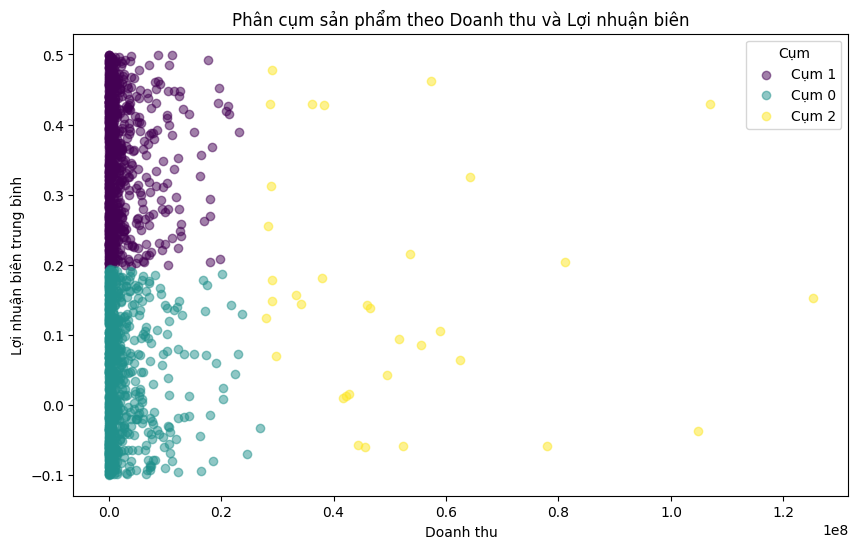

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from dataflow import df_train, df_test, df_geography, df_product

# Kết nối dữ liệu
df = df_train.merge(df_geography, on='Zip', how='left').merge(df_product, on='ProductID', how='left')

# Tính Profit Margin
df_train["Profit_Margin"] = (df_train["Revenue"] - df_train["COGS"]) / df_train["Revenue"]

# Groupby theo ProductID và Date trước
df_grouped = df_train.groupby(["ProductID", "Date"]).agg(
    Revenue=("Revenue", "sum"),
    Units=("Units", "sum"),
    Profit_Margin=("Profit_Margin", "mean")  # Tính trung bình biên lợi nhuận trong ngày
).reset_index()

# Tính tổng Revenue, Units, Profit Margin theo từng sản phẩm
df_summary = df_grouped.groupby("ProductID").agg(
    Revenue=("Revenue", "sum"),
    Units=("Units", "sum"),
    Profit_Margin=("Profit_Margin", "mean")  # Trung bình biên lợi nhuận của sản phẩm
).reset_index()

# Chuẩn hóa dữ liệu để phân cụm
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_summary[["Revenue", "Profit_Margin"]])

# Tìm số cụm tốt nhất bằng phương pháp silhouette score
silhouette_scores = []
k_range = range(2, 11)  # Tìm số cụm từ 2 đến 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Xác định số cụm tốt nhất (k có silhouette score cao nhất)
best_k = k_range[np.argmax(silhouette_scores)]

# Thực hiện phân cụm với số cụm tốt nhất
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_summary["Cluster"] = kmeans.fit_predict(X_scaled)

# Plot clustering results with legend
plt.figure(figsize=(10, 6))

# Get unique clusters and define colors
clusters = df_summary["Cluster"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(clusters)))

# Plot each cluster separately with legend
for cluster, color in zip(clusters, colors):
    subset = df_summary[df_summary["Cluster"] == cluster]
    plt.scatter(subset["Revenue"], subset["Profit_Margin"], color=color, label=f"Cụm {cluster}", alpha=0.5)
plt.xlabel("Doanh thu")
plt.ylabel("Lợi nhuận biên trung bình")
plt.title(f"Phân cụm sản phẩm theo Doanh thu và Lợi nhuận biên")
plt.legend(title="Cụm")
plt.show()


### Nhận xét: 

##### 🔍 1️⃣ Phân bố của các cụm:

✔ Cluster 0 (Xanh lam) - Doanh thu thấp, lợi nhuận thấp

- Đây là nhóm có doanh thu nhỏ và tỷ suất lợi nhuận trung bình thấp hoặc âm.
- Có thể là các sản phẩm phổ thông, dễ bán nhưng tỷ suất lợi nhuận thấp.
- Một số sản phẩm trong cụm này có thể đang lỗ nhẹ (Profit Margin < 0).

✔ Cluster 1 (Tím) - Doanh thu thấp, lợi nhuận cao

- Nhóm sản phẩm có doanh thu thấp nhưng tỷ suất lợi nhuận cao.
- Đây có thể là các sản phẩm ngách hoặc cao cấp có lợi nhuận tốt nhưng ít người mua.
- Nếu doanh thu có thể tăng lên, chúng có thể trở thành sản phẩm chiến lược.

✔ Cluster 2 (Vàng) - Doanh thu cao, lợi nhuận đa dạng

- Đây là nhóm sản phẩm chiến lược, có doanh thu cao.
- Tuy nhiên, tỷ suất lợi nhuận biến động mạnh từ thấp đến rất cao.
- Một số sản phẩm có thể bán rất chạy nhưng lợi nhuận thấp (chiến lược giá thấp, cạnh tranh).
- Một số sản phẩm có thể vừa bán chạy vừa có lợi nhuận cao (sản phẩm chủ lực). 

##### 🚀 2️⃣ Chiến lược kinh doanh gợi ý

✔ Đối với sản phẩm trong Cluster 0 (Xanh lam):

- Xem xét loại bỏ các sản phẩm có lợi nhuận âm hoặc quá thấp.
- Cải thiện chiến lược giá, đàm phán giá nhập hàng để tăng lợi nhuận.
- Tăng cường quảng cáo, khuyến mãi hoặc điều chỉnh dòng sản phẩm để thúc đẩy doanh số.

✔ Đối với sản phẩm trong Cluster 1 (Tím)

- Đầu tư vào marketing và quảng cáo để tăng doanh thu.
- Đẩy mạnh tiếp cận nhóm khách hàng tiềm năng (thị trường ngách, khách hàng cao cấp).
- Xây dựng các gói khuyến mãi, upselling để tăng số lượng bán.

✔ Đối với sản phẩm trong Cluster 2 (Vàng)

- Xác định các sản phẩm có doanh thu cao và lợi nhuận cao → Tập trung nguồn lực vào chúng.
- Đối với sản phẩm có doanh thu cao nhưng lợi nhuận thấp:
    + Kiểm tra lại chiến lược giá.
    + Tìm cách giảm chi phí sản xuất hoặc vận hành để tăng lợi nhuận.
- Nếu sản phẩm có lợi nhuận tốt và doanh thu cao, có thể mở rộng quy mô đầu tư.

### 3.2.2 Phân cụm sản phẩm dựa theo mean và std của Profit Margin

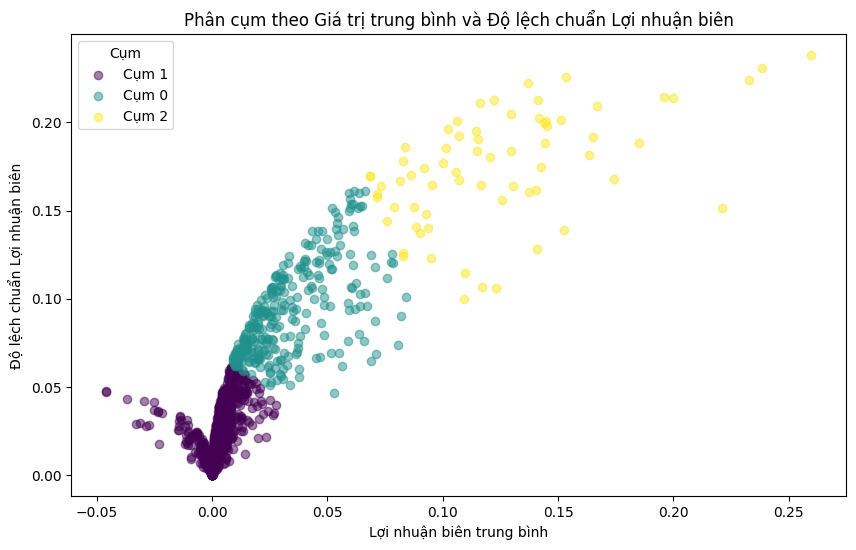

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from dataflow import df_train, df_test, df_geography, df_product

# Kết nối dữ liệu
df = df_train.merge(df_geography, on='Zip', how='left').merge(df_product, on='ProductID', how='left')

# Đảm bảo cột "Date" có định dạng datetime
df_train["Date"] = pd.to_datetime(df_train["Date"])

# Tính Profit Margin
df_train["Profit_Margin"] = (df_train["Revenue"] - df_train["COGS"]) / df_train["Revenue"]

# Groupby theo ProductID và Date trước
df_grouped = df_train.groupby(["ProductID", "Date"]).agg(
    Revenue=("Revenue", "sum"),
    Units=("Units", "sum"),
    Profit_Margin=("Profit_Margin", "mean")  # Tính trung bình biên lợi nhuận trong ngày
).reset_index()

# Tính tổng Revenue, Units, Profit Margin theo từng sản phẩm
df_summary = df_grouped.groupby("ProductID").agg(
    Revenue=("Revenue", "sum"),
    Units=("Units", "sum"),
    Profit_Margin=("Profit_Margin", "mean")  # Trung bình biên lợi nhuận của sản phẩm
).reset_index()

# Xác định toàn bộ phạm vi ngày
date_range_full = pd.date_range(start=df_grouped["Date"].min(), end=df_grouped["Date"].max())

# Tạo DataFrame chứa mọi kết hợp ProductID và Date
products = df_grouped["ProductID"].unique()
full_index = pd.MultiIndex.from_product([products, date_range_full], names=["ProductID", "Date"])
df_full = pd.DataFrame(index=full_index).reset_index()

# Hợp nhất với dữ liệu gốc để đảm bảo đầy đủ ngày
df_train_full = df_full.merge(df_grouped, on=["ProductID", "Date"], how="left")

# Điền giá trị NaN (giả định ngày không có giao dịch tức là doanh thu và số lượng bán = 0)
df_train_full[["Revenue", "Units", "Profit_Margin"]] = df_train_full[["Revenue", "Units", "Profit_Margin"]].fillna(0)

# Tính trung bình (mean) và độ lệch chuẩn (std) trên toàn bộ thời gian của từng sản phẩm
df_stats = df_train_full.groupby("ProductID").agg({"Revenue": ["mean", "std"], "Units": ["mean", "std"], "Profit_Margin": ["mean", "std"]})
df_stats.columns = ["Revenue_mean", "Revenue_std", "Units_mean", "Units_std", "Profit_Margin_mean", "Profit_Margin_std"]
df_stats = df_stats.reset_index()

# Điền giá trị NaN nếu có
df_stats.fillna(df_stats.mean(), inplace=True)

# Chuẩn hóa dữ liệu trước khi phân cụm
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_stats[["Profit_Margin_mean", "Profit_Margin_std"]])

# Sử dụng Silhouette Score để tìm số cụm tối ưu
silhouette_scores = []
k_range = range(2, 11)  # Silhouette không dùng k=1

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

best_k = 3  

# **Bước 6: Phân cụm với số cụm tốt nhất**
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_stats["Cluster"] = kmeans.fit_predict(X_scaled)

# **Bước 7: Vẽ đồ thị phân cụm theo Units_mean và Units_std**
plt.figure(figsize=(10, 6))
clusters = df_stats["Cluster"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(clusters)))

for cluster, color in zip(clusters, colors):
    subset = df_stats[df_stats["Cluster"] == cluster]
    plt.scatter(subset["Profit_Margin_mean"], subset["Profit_Margin_std"], color=color, label=f"Cụm {cluster}", alpha=0.5)


plt.xlabel("Lợi nhuận biên trung bình")
plt.ylabel("Độ lệch chuẩn Lợi nhuận biên")
plt.title(f"Phân cụm theo Giá trị trung bình và Độ lệch chuẩn Lợi nhuận biên")
plt.legend(title="Cụm")
plt.show()

### 3.3.3 Phân biên Pareto sản phẩm dựa theo mean và std của Profit Margin

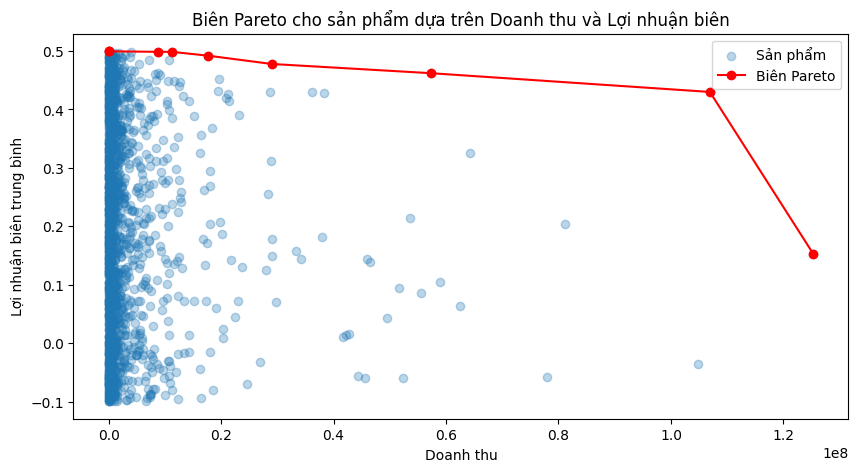

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from dataflow import df_train, df_test, df_geography, df_product

# Kết nối dữ liệu
df = df_train.merge(df_geography, on='Zip', how='left').merge(df_product, on='ProductID', how='left')

# Tính Profit Margin
df_train["Profit_Margin"] = (df_train["Revenue"] - df_train["COGS"]) / df_train["Revenue"]

# Groupby theo ProductID và Date trước
df_grouped = df_train.groupby(["ProductID", "Date"]).agg(
    Revenue=("Revenue", "sum"),
    Units=("Units", "sum"),
    Profit_Margin=("Profit_Margin", "mean")  # Tính trung bình biên lợi nhuận trong ngày
).reset_index()

# Tính tổng Revenue, Units, Profit Margin theo từng sản phẩm
df_summary = df_grouped.groupby("ProductID").agg(
    Revenue=("Revenue", "sum"),
    Units=("Units", "sum"),
    Profit_Margin=("Profit_Margin", "mean")  # Trung bình biên lợi nhuận của sản phẩm
).reset_index()

# Hàm tìm Pareto Front (theo hướng max)
def pareto_frontier(df, x_col, y_col):
    df_sorted = df.sort_values(by=[x_col, y_col], ascending=[False, False]).reset_index(drop=True)
    pareto_front = [df_sorted.iloc[0]]

    for i in range(1, len(df_sorted)):
        if df_sorted.iloc[i][y_col] > pareto_front[-1][y_col]:  # Kiểm tra trội
            pareto_front.append(df_sorted.iloc[i])

    return pd.DataFrame(pareto_front)

# Xác định Pareto Front cho (Units, Revenue)
pareto_units_revenue = pareto_frontier(df_summary, "Units", "Revenue")

# Xác định Pareto Front cho (Revenue, Profit Margin)
pareto_revenue_margin = pareto_frontier(df_summary, "Revenue", "Profit_Margin")

# Hiển thị kết quả Pareto Front cho (Revenue, Profit Margin)
plt.figure(figsize=(10, 5))
plt.scatter(df_summary["Revenue"], df_summary["Profit_Margin"], alpha=0.3, label="Sản phẩm")
plt.plot(pareto_revenue_margin["Revenue"], pareto_revenue_margin["Profit_Margin"], "r-o", label="Biên Pareto")
plt.xlabel("Doanh thu")
plt.ylabel("Lợi nhuận biên trung bình")
plt.title("Biên Pareto cho sản phẩm dựa trên Doanh thu và Lợi nhuận biên")
plt.legend()
plt.show()



### Nhận xét:

- Ở vùng doanh thu thấp, biên lợi nhuận khá cao (~50%).
- Ở vùng doanh thu cao, biên lợi nhuận giảm dần, cho thấy sự đánh đổi giữa tăng doanh thu và tối ưu lợi nhuận.

⚠ Vấn đề cần lưu ý

- Có sự sụt giảm mạnh về biên lợi nhuận khi doanh thu đạt mức cao nhất (điểm cuối của đường Pareto Front).
- Điều này có thể xảy ra do các sản phẩm có doanh thu lớn thường phải giảm giá hoặc có chi phí sản xuất cao hơn. Có thể đây là sản phẩm có sức mua lớn nhưng lợi nhuận biên thấp.
- Phần lớn sản phẩm khác nằm bên trái Pareto Front, tức là chưa đạt tối ưu.

- Nhiều sản phẩm có doanh thu thấp nhưng lợi nhuận biên tốt, có thể là sản phẩm ngách hoặc cao cấp.
- Ngược lại, nhiều sản phẩm có doanh thu cao nhưng lợi nhuận thấp, có thể là do chiến lược giá hoặc chi phí sản xuất cao.

##### Chiến lược tối ưu hóa danh mục sản phẩm
✅ Nhóm sản phẩm có doanh thu cao nhưng lợi nhuận thấp

- Xem xét tối ưu chi phí sản xuất để cải thiện lợi nhuận biên.
- Nâng giá nhẹ nếu thị trường chấp nhận.
- Tìm kiếm đối tác cung ứng tốt hơn để giảm giá vốn hàng bán (COGS).

✅ Nhóm sản phẩm có lợi nhuận cao nhưng doanh thu thấp

- Tăng đầu tư marketing để mở rộng thị phần.
- Khuyến mãi hoặc giảm giá nhẹ để kích thích nhu cầu.
- Xây dựng chiến lược mở rộng kênh bán hàng (online, offline, đại lý).

✅ Tận dụng Pareto Front để đưa ra quyết định

- Duy trì và mở rộng sản phẩm nằm trên Pareto Front.
- Dịch chuyển các sản phẩm chưa tối ưu lên Pareto Front bằng cách cải thiện cả Revenue và Profit Margin.
- Loại bỏ hoặc thay đổi chiến lược với các sản phẩm không có lợi thế.

# 4. Tính biên Pareto theo thời gian 

## 4.1 Sự thay đổi biên Pareto theo năm đối với cặp (Revenue, Units).

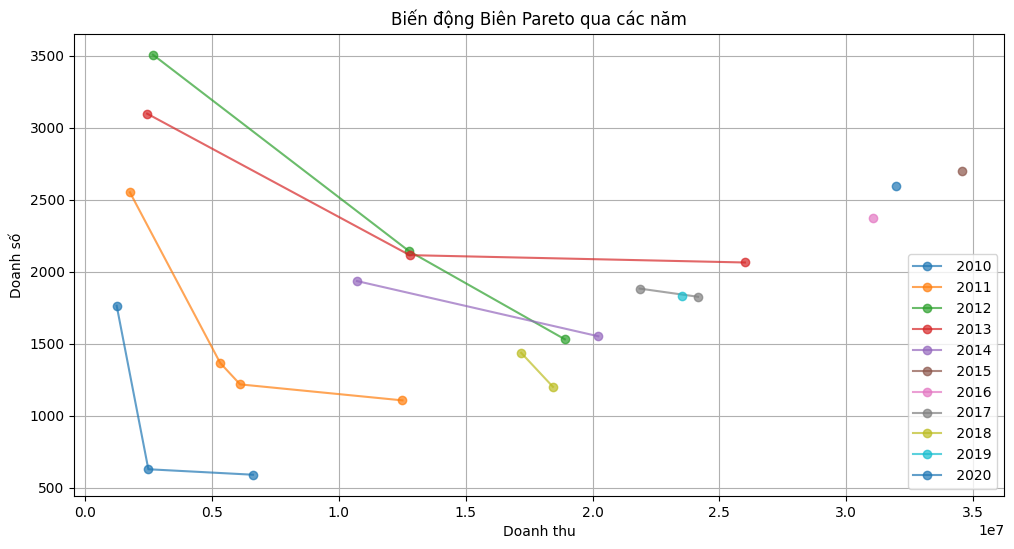

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from dataflow import df_train, df_test, df_geography, df_product

# Kết nối dữ liệu
df = df_train.merge(df_geography, on='Zip', how='left').merge(df_product, on='ProductID', how='left')

# Tính Profit Margin
df_train["Profit_Margin"] = (df_train["Revenue"] - df_train["COGS"]) / df_train["Revenue"]

# Groupby theo ProductID và Date trước
df_grouped = df_train.groupby(["ProductID", "Date"]).agg(
    Revenue=("Revenue", "sum"),
    Units=("Units", "sum"),
    Profit_Margin=("Profit_Margin", "mean")  # Tính trung bình biên lợi nhuận trong ngày
).reset_index()

# Tính tổng Revenue, Units, Profit Margin theo từng sản phẩm
df_summary = df_grouped.groupby("ProductID").agg(
    Revenue=("Revenue", "sum"),
    Units=("Units", "sum"),
    Profit_Margin=("Profit_Margin", "mean")  # Trung bình biên lợi nhuận của sản phẩm
).reset_index()

# Hàm tìm Pareto Front (theo hướng max)
def pareto_frontier(df, x_col, y_col):
    df_sorted = df.sort_values(by=[x_col, y_col], ascending=[False, False]).reset_index(drop=True)
    pareto_front = [df_sorted.iloc[0]]

    for i in range(1, len(df_sorted)):
        if df_sorted.iloc[i][y_col] > pareto_front[-1][y_col]:  # Kiểm tra trội
            pareto_front.append(df_sorted.iloc[i])

    return pd.DataFrame(pareto_front)

# Xác định Pareto Front cho (Units, Revenue)
pareto_units_revenue = pareto_frontier(df_summary, "Units", "Revenue")

# Xác định Pareto Front cho (Revenue, Profit Margin)
pareto_revenue_margin = pareto_frontier(df_summary, "Revenue", "Profit_Margin")


# Thêm cột năm để theo dõi sự thay đổi theo năm
df_train["Year"] = df_train["Date"].dt.year

# Groupby theo ProductID và Year để tính tổng Revenue và Units mỗi năm
df_yearly = df_train.groupby(["ProductID", "Year"]).agg({"Revenue": "sum", "Units": "sum", "Profit_Margin": "mean" }).reset_index()

# Vẽ sự thay đổi Pareto Front qua các năm
plt.figure(figsize=(12, 6))

for year in sorted(df_yearly["Year"].unique()):
    df_year = df_yearly[df_yearly["Year"] == year]
    pareto_year = pareto_frontier(df_year, "Revenue", "Units")

    plt.plot(pareto_year["Revenue"], pareto_year["Units"], marker="o", linestyle="-", label=f" {year}", alpha=0.7)

plt.xlabel("Doanh thu")
plt.ylabel("Doanh số")
plt.title("Biến động Biên Pareto qua các năm")
plt.legend()
plt.grid()
plt.show()



## 4.2 Sự thay đổi biên Pareto theo năm đối với cặp (Revenue, Profit Margin).

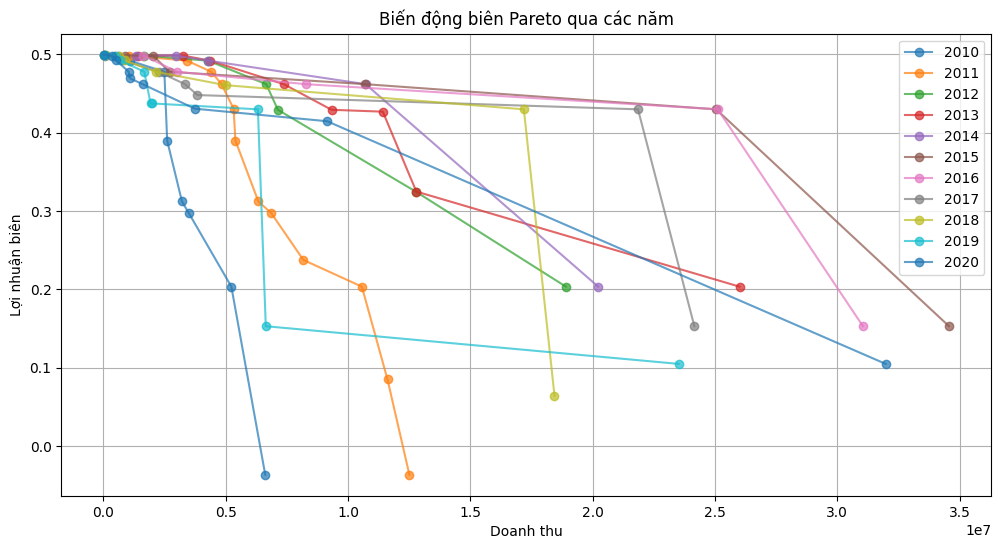

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from dataflow import df_train, df_test, df_geography, df_product

# Kết nối dữ liệu
df = df_train.merge(df_geography, on='Zip', how='left').merge(df_product, on='ProductID', how='left')

# Tính Profit Margin
df_train["Profit_Margin"] = (df_train["Revenue"] - df_train["COGS"]) / df_train["Revenue"]

# Groupby theo ProductID và Date trước
df_grouped = df_train.groupby(["ProductID", "Date"]).agg(
    Revenue=("Revenue", "sum"),
    Units=("Units", "sum"),
    Profit_Margin=("Profit_Margin", "mean")  # Tính trung bình biên lợi nhuận trong ngày
).reset_index()

# Tính tổng Revenue, Units, Profit Margin theo từng sản phẩm
df_summary = df_grouped.groupby("ProductID").agg(
    Revenue=("Revenue", "sum"),
    Units=("Units", "sum"),
    Profit_Margin=("Profit_Margin", "mean")  # Trung bình biên lợi nhuận của sản phẩm
).reset_index()

# Hàm tìm Pareto Front (theo hướng max)
def pareto_frontier(df, x_col, y_col):
    df_sorted = df.sort_values(by=[x_col, y_col], ascending=[False, False]).reset_index(drop=True)
    pareto_front = [df_sorted.iloc[0]]

    for i in range(1, len(df_sorted)):
        if df_sorted.iloc[i][y_col] > pareto_front[-1][y_col]:  # Kiểm tra trội
            pareto_front.append(df_sorted.iloc[i])

    return pd.DataFrame(pareto_front)

# Xác định Pareto Front cho (Units, Revenue)
pareto_units_revenue = pareto_frontier(df_summary, "Units", "Revenue")

# Xác định Pareto Front cho (Revenue, Profit Margin)
pareto_revenue_margin = pareto_frontier(df_summary, "Revenue", "Profit_Margin")

# Thêm cột năm để theo dõi sự thay đổi theo năm
df_train["Year"] = df_train["Date"].dt.year

# Groupby theo ProductID và Year để tính tổng Revenue và Units mỗi năm
df_yearly = df_train.groupby(["ProductID", "Year"]).agg({"Revenue": "sum", "Units": "sum", "Profit_Margin": "mean" }).reset_index()

# Vẽ sự thay đổi Pareto Front qua các năm
plt.figure(figsize=(12, 6))

for year in sorted(df_yearly["Year"].unique()):
    df_year = df_yearly[df_yearly["Year"] == year]
    pareto_year = pareto_frontier(df_year, "Revenue", "Profit_Margin")

    plt.plot(pareto_year["Revenue"], pareto_year["Profit_Margin"], marker="o", linestyle="-", label=f"{year}", alpha=0.7)

plt.xlabel("Doanh thu")
plt.ylabel("Lợi nhuận biên")
plt.title("Biến động biên Pareto qua các năm")
plt.legend()
plt.grid()
plt.show()